#  차원 축소
## 주성분 분석(Principal Component Analysis)

- 비지도학습 알고리즘
- 차원축소 알고리즘(dimensionality reduction algorithm)
- 활용분야는 visualization, noise filtering, feature extraction and engineering

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
width=800; height=500

## 1. 차원의 저주

### kaggle('../data/test_encoded.csv')로 search
https://www.kaggle.com/f3nuaimi/senior-project-ii/data?scriptVersionId=10833316

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199
0,0.0,0.0,0.024538,0.0,0.000000,0.045839,0.0,0.0,0.149685,0.0,...,0.0,0.141402,0.042400,0.0,0.0,0.0,0.028296,0.0,0.044551,0.0
1,0.0,0.0,0.058296,0.0,0.017126,0.091006,0.0,0.0,0.239490,0.0,...,0.0,0.248532,0.086392,0.0,0.0,0.0,0.025259,0.0,0.074349,0.0
2,0.0,0.0,0.051791,0.0,0.012360,0.083106,0.0,0.0,0.221741,0.0,...,0.0,0.227867,0.078469,0.0,0.0,0.0,0.025879,0.0,0.069934,0.0
3,0.0,0.0,0.038092,0.0,0.004549,0.065755,0.0,0.0,0.189635,0.0,...,0.0,0.187429,0.061617,0.0,0.0,0.0,0.028196,0.0,0.057663,0.0
4,0.0,0.0,0.040451,0.0,0.006021,0.069720,0.0,0.0,0.194577,0.0,...,0.0,0.194506,0.064851,0.0,0.0,0.0,0.027344,0.0,0.060139,0.0


(49342, 200)

Text(0.5, 0, '주성분 개 수')

Text(0, 0.5, '총변동량 누적 설명 비율')

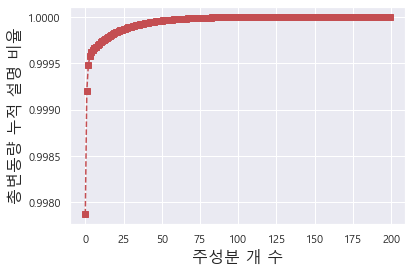

In [2]:
test = pd.read_csv('../data/test_encoded.csv')
test.head(); test.shape

from sklearn.decomposition import PCA
plt.rcParams['font.family']='Malgun Gothic'
pca = PCA().fit(test)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'rs--')
plt.xlabel('주성분 개 수', fontsize='16'); plt.ylabel('총변동량 누적 설명 비율', fontsize='16')

## 2.1 주성분 개념

- 2차원의 200개 무작위 샘플

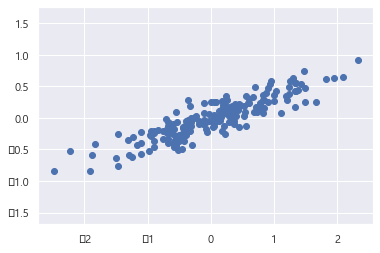

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

Scikit-Learn's ``PCA`` estimator를 사용

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

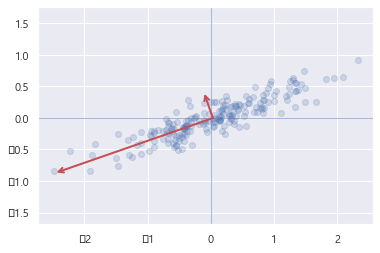

In [5]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2, color='r',
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axvline(0, linewidth=0.5); plt.axhline(0, linewidth=0.5)
plt.axis('equal');

##### 원래 데이터의 기저벡터(base vector)인 (1,0), (0,1)에서 관측된 x1, x2의 분산은 

  * 새로운 주성분(principal components) 벡터(화살표)에서 주성분 1과 2에 의해 표현될 수 있고(*principal axes*으로 자료 변환)
  * 원래 데이터의 총변동량(원래 데이터의 평균조정된 데이터의 내적(공분산)의 trace(x1, x1의 분산의 합))의 
  * 77%를 주성분 1은 76%, 1%를 각각 설명한다.


##### 즉 원래데이터는 새로운 기저벡터인 주성분벡터에서 projection(data representation, transformation)이 되었다.
* The transformation from data axes to principal axes)
   * affine transformation, which is composed of a translation, rotation, and uniform scaling.

<font color='red'> 주성분(components) 행렬은 2개의 직교벡터 (-0.9444, -0.3286)과 (-0.3286, 0.9444)로 구성

In [6]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


<font color='red'> 주성분 행렬은 직교행렬(Orthogonal matrix)로 직교행렬의 내적은 Identity 행렬

In [7]:
(pca.components_.T@pca.components_).round(2)

array([[ 1., -0.],
       [-0.,  1.]])

<font color='red'> 주성분의 총변동량에 대한 설명비율(explained variance)은 2개 직교벡터의 화살표 크기

In [8]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


## 2.2 차원축소(dimensionality reduction)

- PCA 알고리즘을 사용하여  high dimensionality 데이터를 저차원의 데이터로 빠르고 효율적으로 인식하여 원래데이터로 복원할 수있다.
  * 얼굴인식, 이미지복원 등 분야에서 활용

In [9]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

PCA(n_components=1)

original shape:    (200, 2)
transformed shape: (200, 1)


##### 2차원의 원자료를 1차원으로 축소한 주성분으로 inverse transform하여 원자료를 복원하여  원자료와 같이 표현

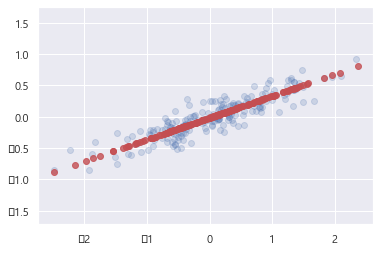

In [10]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, color='r')
plt.axis('equal');

- 옅은 색은 원자료이고 붉은 색은 projected version임
- 총변동량은 가장 많이 설명하는 주성분으로 복원하면 거의 원자료와 비슷하게 됨

## 2.3 주성분 분석(PCA)과 시각화

In [11]:
X1 = np.array([int(num) for num in np.linspace(0, 15, 10)]).reshape(2,5)
X2 = np.array([int(num) for num in np.linspace(20, 55, 10)]).reshape(2,5)
X = np.concatenate((X1, X2))
X

array([[ 0,  1,  3,  5,  6],
       [ 8, 10, 11, 13, 15],
       [20, 23, 27, 31, 35],
       [39, 43, 47, 51, 55]])

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X) # 평균조정된 X
print(f'평균: {X_scaled.mean().round(2)}, 표준펀차: {X_scaled.std()}')

평균: 0.0, 표준펀차: 1.0


In [13]:
np.dot(X_scaled.T, X_scaled).round(2) # X_scaled.T@X_scaled
print(f'총변동량은: {np.trace(np.dot(X_scaled.T, X_scaled))}')

array([[4.  , 4.  , 3.99, 3.99, 3.98],
       [4.  , 4.  , 4.  , 3.99, 3.98],
       [3.99, 4.  , 4.  , 4.  , 3.99],
       [3.99, 3.99, 4.  , 4.  , 4.  ],
       [3.98, 3.98, 3.99, 4.  , 4.  ]])

총변동량은: 20.0


In [14]:
plt.rcParams['font.family']='Malgun Gothic'
import warnings
warnings.filterwarnings('ignore')

In [15]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_scaled)

In [16]:
pca.explained_variance_ratio_

array([9.98493116e-01, 1.43601776e-03, 7.08661701e-05, 5.01774775e-33])

Text(0.5, 0, '주성분 개 수')

Text(0, 0.5, '총변동량 누적 설명 비율')

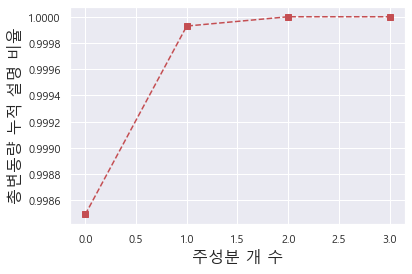

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'rs--')
plt.xlabel('주성분 개 수', fontsize='16')
plt.ylabel('총변동량 누적 설명 비율', fontsize='16')

In [18]:
pca = PCA(n_components=1)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print('총변동량 설명비율 (%) :', np.round(pca.explained_variance_ratio_*100, 2))

PCA(n_components=1)

총변동량 설명비율 (%) : [99.85]


In [19]:
(X_pca.T@X_pca).round(2)
print(f'공분산은: {np.trace(np.dot(X_pca.T, X_pca))}')
(np.trace(np.dot(X_pca.T, X_pca))/20)*100

array([[19.97]])

공분산은: 19.969862321486797


99.84931160743399

## 4. 주성분 분석(PCA)과 SVD(singular value decomposition)
- 주성분 분석을 위한 알고리즘 소개

   * (1) 분광 분해(Spectral decomposition) : 요인분석(factor analysis)
   * (2) 특이치 분해(Singular Value Decomposition) : Scikit-learn API
   * (3) 축소된 특이치 분해(Truncated SVD)
   
 https://angeloyeo.github.io/2019/08/01/SVD.html

numpy.ndarray

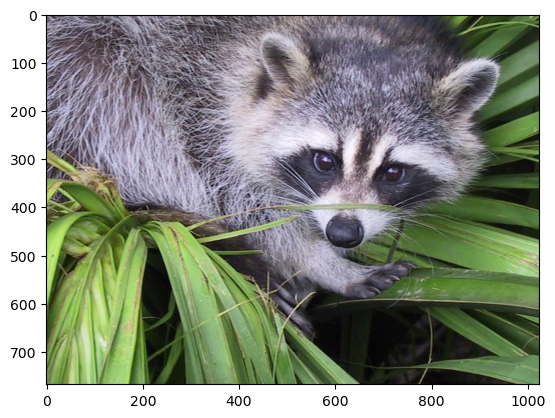

In [20]:
from scipy import misc
sns.reset_defaults() 
img = misc.face()
type(img)
plt.imshow(img)

In [21]:
img.shape
img.ndim
pd.DataFrame(img[:, :, 0])

(768, 1024, 3)

3

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,121,138,153,155,155,158,159,156,147,137,...,170,163,159,150,135,121,116,119,131,139
1,89,110,130,137,141,148,152,151,164,154,...,161,155,147,136,121,109,107,118,134,146
2,73,94,115,123,127,131,132,129,139,135,...,151,143,124,116,108,102,104,117,133,144
3,81,97,113,120,125,126,120,111,101,101,...,131,119,100,101,103,107,110,116,121,125
4,103,113,123,132,142,147,140,127,109,101,...,101,89,93,97,106,112,115,112,108,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,110,97,92,101,115,119,117,118,106,114,...,117,116,117,117,117,118,118,118,118,118
764,98,93,98,114,122,120,115,116,116,122,...,117,116,118,119,119,119,120,120,120,119
765,87,94,107,123,127,121,117,118,122,126,...,124,123,118,119,120,121,121,120,119,119
766,85,95,112,123,127,124,123,123,124,129,...,122,124,118,118,119,122,122,121,120,120


In [22]:
img_array = img / 255
img_array.shape
img_gray = img_array @ [0.2126, 0.7152, 0.0722]
img_gray.shape

(768, 1024, 3)

(768, 1024)

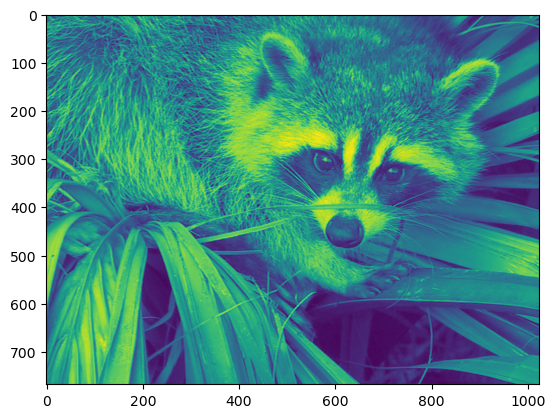

In [23]:
plt.imshow(img_gray)

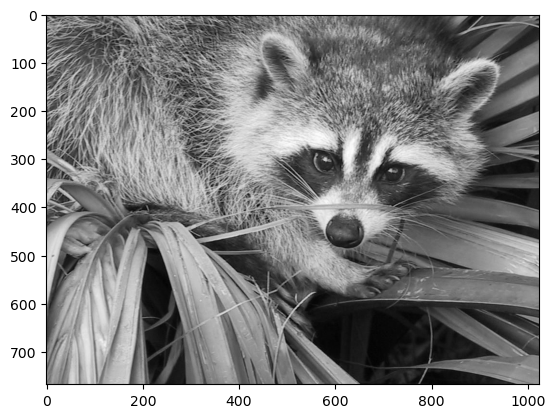

In [24]:
plt.imshow(img_gray, cmap="gray")

In [25]:
red_array = img_array[:, :, 0]
green_array = img_array[:, :, 1]
blue_array = img_array[:, :, 2]

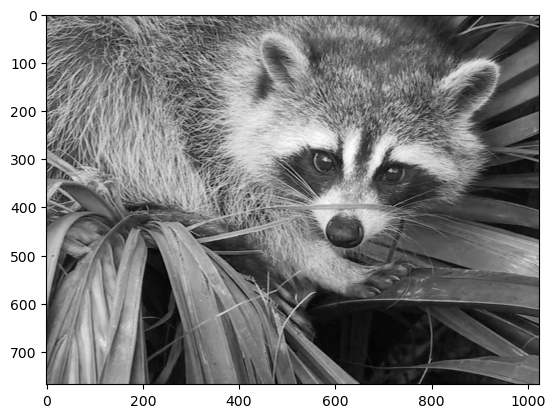

In [26]:
plt.imshow(red_array, cmap="gray")

## 5. PCA for visualization: Hand-written digits

고차원 자료인 수기체 이미지에 PCA 적용

In [27]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

- 8×8 pixel images 자료, 총 64차원

In [28]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


2 개의 주성분으로 2차원 평면에서 이미지 기호(0~9) 확인

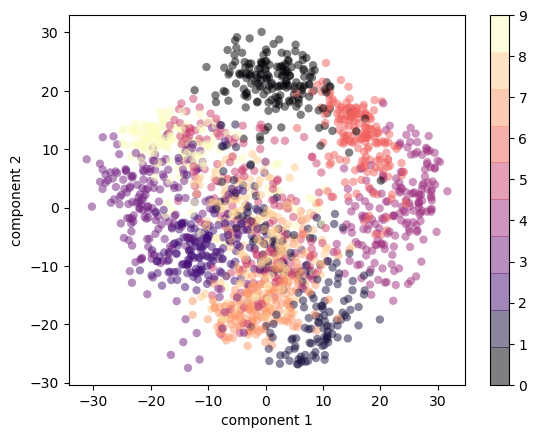

In [29]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('magma', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

원래 데이터(64 차원)에서 가장 큰 분산을 갖는 방향을 2개의 주성분에 의한 각 데이터 포인트의 투영입니다.
- 개념적으로 64 차원 공간에서 최적의 확장 및 회전 선형변환을 발견하여 2차원에서 거의 완벽하게 비지도 학습하여 구분에 성공

### 주성분의 의미

64차원의 벡터로 이루어진 원자료를
$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

차원이 축소된 주성분으로 총 변동량을 대부분 설명이 가능하다. 64차원의 변수의 선형결합으로 원자료는 아래와 같이 표현

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

원자료의 90%를 표현할 수 있는 주성분(새로운 기저변수)

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

PCA는 최적의 기저변수와 각 기저변수의 계수로 이루어진 함수를 찾는 과정(optimal basis functions)

### 최적의 주성분 개수 구하기

총 누적 변동량(cumulative *explained variance ratio*)과 주성분의 개수:

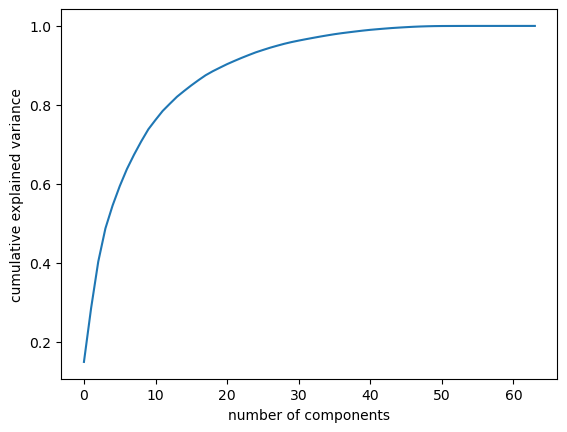

In [30]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## PCA as Noise Filtering

- 잡음(noise)의 영향보다 훨씬 큰 분산을 가진 주성분은 상대적으로 잡음의 영향을 받지 않고 주성분을 사용하여 데이터를 재구성하는 경우 우선적으로 신호를 유지하고 노이즈를 제거하게 됨

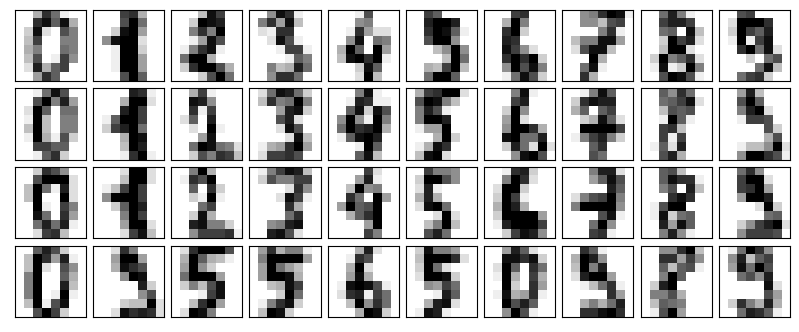

In [31]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

잡음(noise)를 발생시켜 데이터에 주입

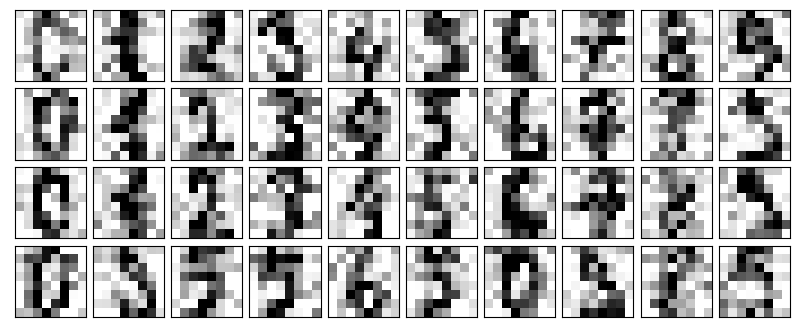

In [32]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

잡음이 있는 이미지는 손상되었지만 50% 총변동량을 갖는 주성분 개수 12개를 추출

In [33]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

주성분의 inverse of the transform으로 이미지를 filtering하여 데이터를 복원

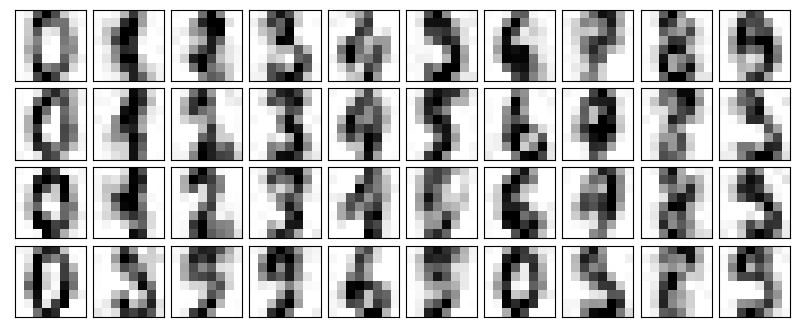

In [34]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

고차원 자료(very high-dimensional data)로 예측하는 대신 원자료의 총변동량을 대부분 설명하는 주성분으로 표현(representation)이 가능

## 6  Eigenfaces

In [35]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [36]:
from sklearn.decomposition import TruncatedSVD
#from sklearn.decomposition import RandomizedPCA

In [37]:
pca = TruncatedSVD(150)
pca.fit(faces.data)

TruncatedSVD(n_components=150)

총 150개의 주성분중에서 24개의 주성분(eigenvectors)을 살펴보면, 즉 24개의 "eigenfaces"

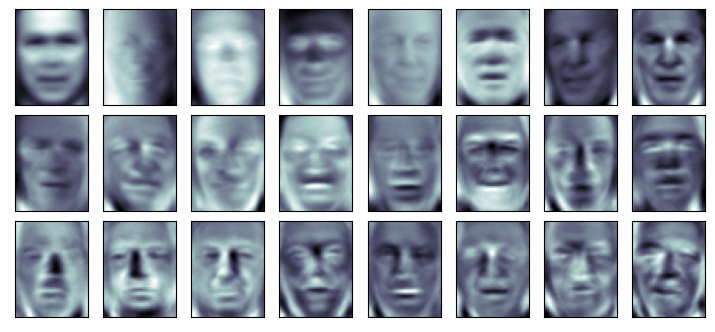

In [38]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

- 왼쪽 윗편은 주성분얼굴 : 얼굴에 비치는 빛의 각도
- 나머자 주성분얼굴 : 눈, 코, 입술

주성분 개수와 누적 총변동량

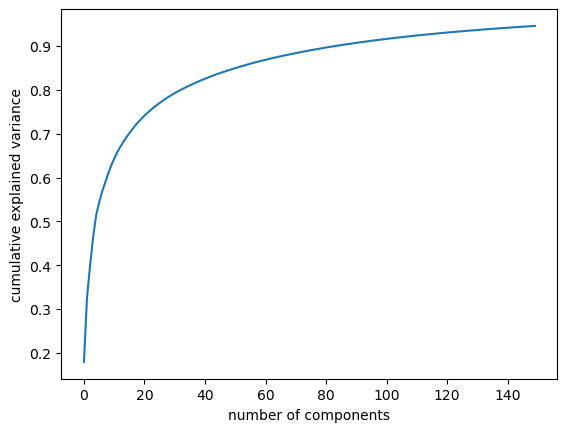

In [39]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

150개의 주성분으로 90%이상의 원자료 변동량을 설명하고 있어 주성분 150개로 원래 이미지를 복원 

In [40]:
# Compute the components and projected faces
pca = TruncatedSVD(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

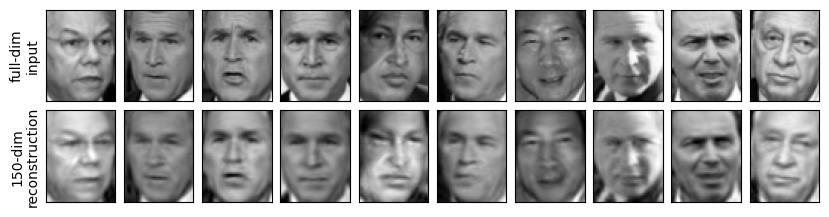

In [41]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

# END

# <font color='red'> 실습

- 미국 패션의류 온라인 업체(Zalando)의 구두와 의류 품목의 흑백 이미지 사진을 학습하여 10 개 유형으로 분류 예측하여 보자. 10개 범주 유형은 다음 그림과 같이 "T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"이다.
- 데이터는 https://www.kaggle.com/zalando-research/fashionmnist?select=fashion-mnist_test.csv 압축파일을 ‘data’ 폴더로 내려받는다.

In [49]:
df = pd.read_csv('../data/fashion-mnist_test.csv')

총 70,000개의 이미지 사진이 있고 각 사진은 784개 픽셀(28*28) 로 나누어진다. 각 픽셀은 명암농도 0부터 255까지 값을 갖는다. 훈련데이터(train) 는 60,000개, 검증데이터(test)는 10,000개이다.

In [50]:
df.head()
df.shape

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(10000, 785)

무작위 층화 샘플링으로 실습을 위해 sampling

In [51]:
df = df.sample(frac=0.1)

In [52]:
X = df.drop(['label'], axis=1)
X = X/255
y = df['label']

<Figure size 640x480 with 0 Axes>

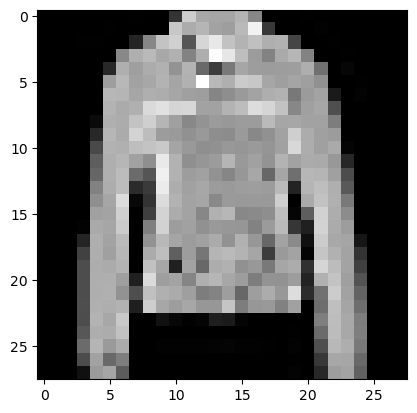

In [53]:
example_index = 225
plt.figure()
_ = plt.imshow(np.reshape(X.values[example_index, :],(28,28)), 'gray')

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [55]:
from sklearn.model_selection import cross_validate, cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV

In [56]:
from sklearn.ensemble import RandomForestClassifier
kf = KFold(n_splits=3)
param_grid = {}
gs = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv = kf) 
y_predict = gs.fit(X_train, y_train).predict(X_test)
y_probas = gs.fit(X_train, y_train).predict_proba(X_test)

In [57]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        33
           1       0.90      0.95      0.93        20
           2       0.60      0.41      0.49        22
           3       0.81      0.81      0.81        27
           4       0.55      0.81      0.66        26
           5       0.91      0.84      0.87        25
           6       0.67      0.52      0.58        31
           7       0.78      0.88      0.82        16
           8       0.88      0.85      0.86        26
           9       0.88      0.96      0.92        24

    accuracy                           0.77       250
   macro avg       0.78      0.78      0.77       250
weighted avg       0.77      0.77      0.77       250



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

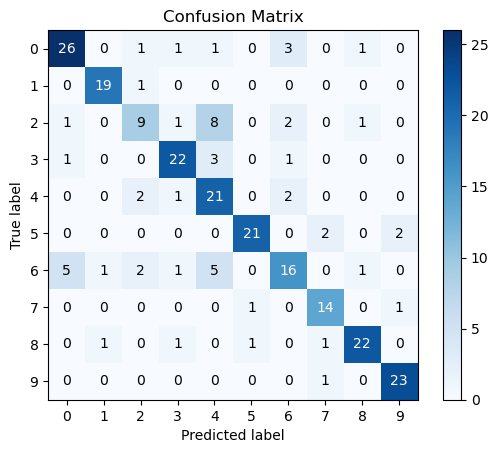

In [58]:
# 시각화 툴
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_predict)

### PCA를 활용하여 예측

In [59]:
pca = PCA(n_components=0.9)
X_reduced = pca.fit_transform(X)
X.shape
X_reduced.shape

(1000, 784)

(1000, 68)

### Pipeline으로 예측 (randomforest classifier)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y)

In [61]:
gs = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv = kf) 
gs.fit(X_train, y_train)
y_predict = gs.predict(X_test)
y_probas = gs.predict_proba(X_test)

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), param_distributions={})

In [62]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        32
           1       1.00      0.90      0.95        21
           2       0.70      0.64      0.67        22
           3       0.70      0.79      0.75        24
           4       0.56      0.75      0.64        20
           5       0.89      0.86      0.88        29
           6       0.68      0.49      0.57        35
           7       0.92      0.88      0.90        25
           8       0.87      0.95      0.91        21
           9       0.76      0.90      0.83        21

    accuracy                           0.77       250
   macro avg       0.78      0.79      0.78       250
weighted avg       0.78      0.77      0.77       250



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

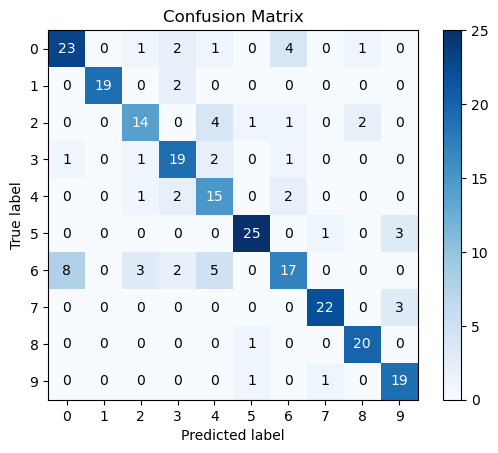

In [63]:
skplt.metrics.plot_confusion_matrix(y_test, y_predict)

In [65]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('../data/fashion-mnist_test.csv')
df = df.sample(frac=0.1)
df.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
1943,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
374,2,0,0,0,0,0,0,22,71,122,...,1,2,0,0,75,40,1,0,0,0


In [66]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(),
                    PCA(n_components=0.9),
                    SGDClassifier(max_iter=1000, loss= 'log', tol=1e-3)) # default 'hinge'는 predic_prba() 에러

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [68]:
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('sgdclassifier', SGDClassifier(loss='log'))])

In [69]:
gs = RandomizedSearchCV(clf, param_grid, cv = kf) 
gs.fit(X_train, y_train)
y_predict = gs.predict(X_test)
y_probas = gs.predict_proba(X_test)

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('pca', PCA(n_components=0.9)),
                                             ('sgdclassifier',
                                              SGDClassifier(loss='log'))]),
                   param_distributions={})

In [70]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        25
           1       0.96      0.96      0.96        28
           2       0.43      0.60      0.50        20
           3       0.69      0.83      0.75        24
           4       0.91      0.32      0.48        31
           5       0.88      0.71      0.79        31
           6       0.39      0.50      0.44        24
           7       0.67      0.74      0.70        19
           8       0.83      0.87      0.85        23
           9       0.68      0.76      0.72        25

    accuracy                           0.70       250
   macro avg       0.72      0.70      0.69       250
weighted avg       0.73      0.70      0.69       250



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

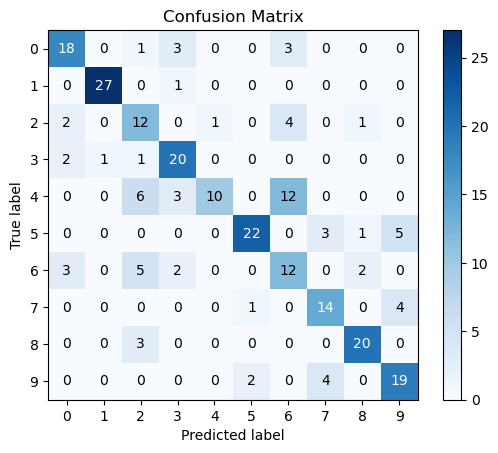

In [71]:
skplt.metrics.plot_confusion_matrix(y_test, y_predict)

# END

https://www.kaggle.com/titan23/us-college-dataset/data 자료로 다운로드

In [43]:
df= pd.read_csv("../data/College.csv")
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [44]:
df.rename(columns = {'Unnamed: 0': 'Name'}, inplace=True)

In [45]:
df.set_index('Name', inplace = True)

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

In [47]:
X = df.drop('Private', axis=1)
y = df['Private']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [48]:
steps = [('scaler', StandardScaler()),
         ('pca', PCA(n_components=.80)),
         ('clf', LogisticRegression())]

pipe_lr = Pipeline(steps)

pipe_lr.fit(X_train, y_train)
train_predictions = pipe_lr.predict(X_train)
test_predictions = pipe_lr.predict(X_test)

print("TRAIN:")
print(classification_report(y_train, train_predictions))

print("TEST:")
print(classification_report(y_test, test_predictions))

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.8)),
                ('clf', LogisticRegression())])

TRAIN:
              precision    recall  f1-score   support

          No       0.91      0.82      0.87       177
         Yes       0.94      0.97      0.95       483

    accuracy                           0.93       660
   macro avg       0.93      0.90      0.91       660
weighted avg       0.93      0.93      0.93       660

TEST:
              precision    recall  f1-score   support

          No       0.86      0.86      0.86        35
         Yes       0.94      0.94      0.94        82

    accuracy                           0.91       117
   macro avg       0.90      0.90      0.90       117
weighted avg       0.91      0.91      0.91       117



https://www.kaggle.com/tilii7/dimensionality-reduction-pca-tsne

# End